In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"G:\AIT\MLOps\ProjectAnalytics\ml\data\filtered_labeled_dataset.csv")
df.head()

,ph_value,do_value,temp_value,salinity_value,ph_value_filtered,do_value_filtered,temp_value_filtered,salinity_value_filtered,label,status
0,6.7,9.66,28.9,232.6,6.743,9.660,28.9,232.754,0,NaN
1,9.9,9.65,28.9,224.1,7.216,9.659,28.9,231.502,0,NaN
2,9.2,9.65,28.9,230.9,7.642,9.658,28.9,230.320,0,NaN
3,7.5,9.66,28.9,225.8,7.995,9.657,28.9,229.274,0,NaN
4,9.4,9.65,28.9,227.5,8.260,9.656,28.9,228.407,0,NaN


In [3]:
df = df.drop(['status', 'ph_value_filtered', 'do_value_filtered', 'temp_value_filtered', 'salinity_value_filtered' ], axis=1)
df.head()

,ph_value,do_value,temp_value,salinity_value,label
0,6.7,9.66,28.9,232.6,0
1,9.9,9.65,28.9,224.1,0
2,9.2,9.65,28.9,230.9,0
3,7.5,9.66,28.9,225.8,0
4,9.4,9.65,28.9,227.5,0


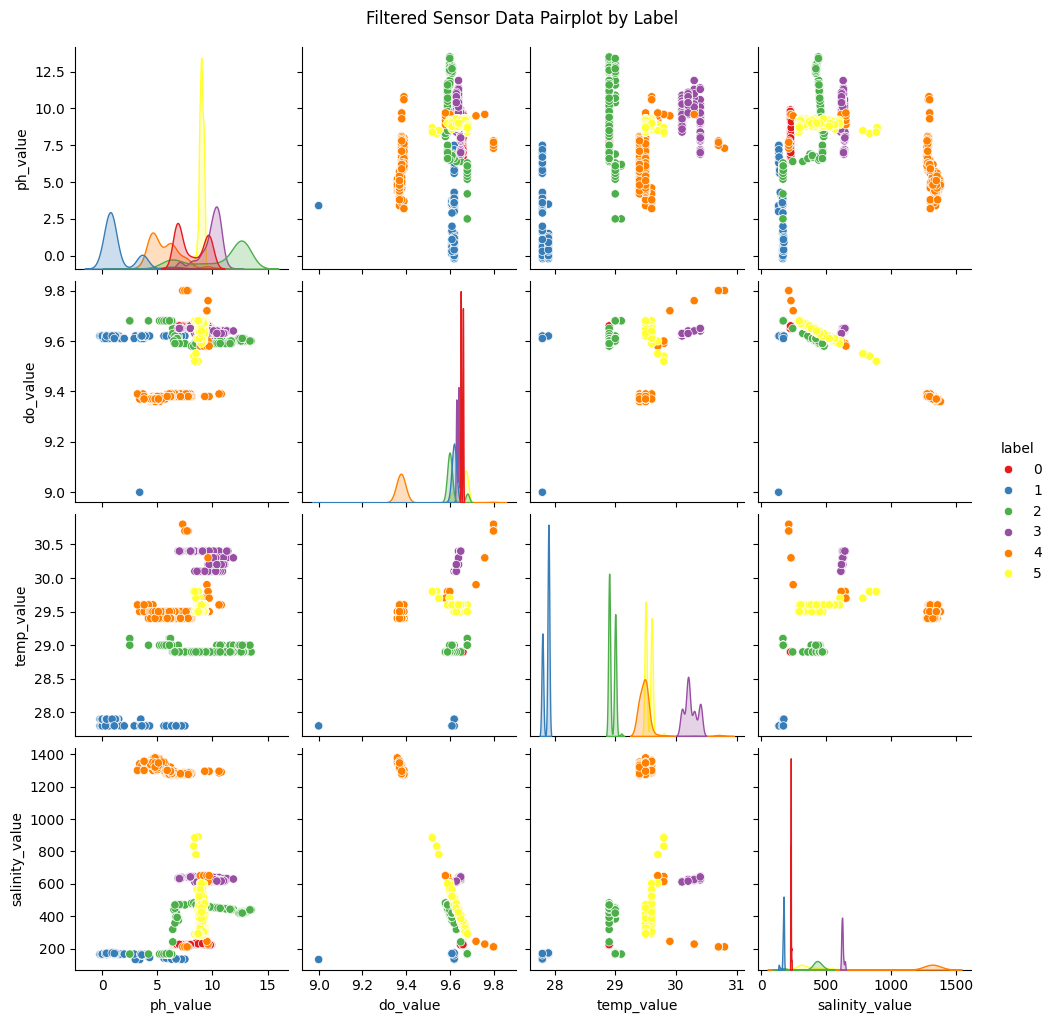

In [4]:
sns.pairplot(df, vars=[
    'ph_value',
    'do_value',
    'temp_value',
    'salinity_value'
], hue='label', palette='Set1')

plt.suptitle("Filtered Sensor Data Pairplot by Label", y=1.02)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [6]:
class_names = ['Clean', 'Low pH', 'High pH', 'Chemical', 'Salt', 'Organic']

In [7]:
X = df[['ph_value', 'do_value', 'temp_value', 'salinity_value']]
y = df['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=7)

In [10]:
k_list = [i for i in range(1, 22)]
cvs_list = []
for i, k in enumerate(k_list):
    model = KNeighborsClassifier(n_neighbors=k)

    cvs = cross_val_score(model, X, y, cv = 5)
    cvs_list.append(cvs.mean().round(4))

cvs_list

[np.float64(0.9869),
 np.float64(0.9793),
 np.float64(0.9784),
 np.float64(0.977),
 np.float64(0.9779),
 np.float64(0.9728),
 np.float64(0.9732),
 np.float64(0.9653),
 np.float64(0.9657),
 np.float64(0.9648),
 np.float64(0.9634),
 np.float64(0.9606),
 np.float64(0.9601),
 np.float64(0.9587),
 np.float64(0.9587),
 np.float64(0.9577),
 np.float64(0.9573),
 np.float64(0.9577),
 np.float64(0.9577),
 np.float64(0.9582),
 np.float64(0.9577)]

Text(0.5, 1.0, 'Score and k')

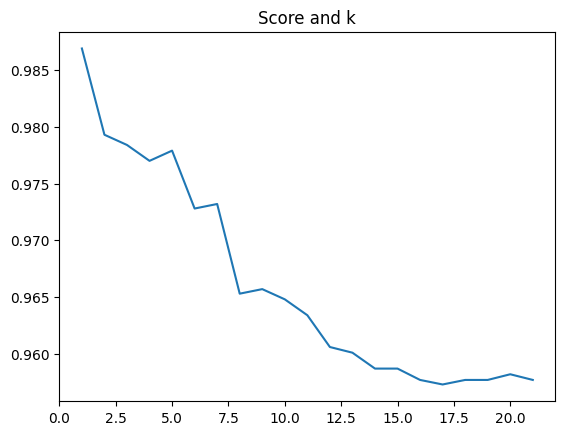

In [22]:
list(zip(k_list, cvs_list))
plt.plot(k_list, cvs_list)
plt.title("Score and k")

In [11]:
model = KNeighborsClassifier(n_neighbors=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(x_train, y_train)

cvs = cross_val_score(model, X, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.993 0.988 0.995 0.977 0.981]
mean : 98.68544600938968


In [12]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=class_names))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Clean       1.00      1.00      1.00        70
      Low pH       1.00      1.00      1.00        76
     High pH       0.97      0.95      0.96        63
    Chemical       1.00      1.00      1.00        76
        Salt       0.99      1.00      0.99        70
     Organic       0.97      0.97      0.97        71

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426

[[70  0  0  0  0  0]
 [ 0 76  0  0  0  0]
 [ 0  0 60  0  1  2]
 [ 0  0  0 76  0  0]
 [ 0  0  0  0 70  0]
 [ 0  0  2  0  0 69]]


In [13]:
import joblib

joblib.dump(model, r'G:\AIT\MLOps\ProjectAnalytics\ml\model/raw_knn_model.joblib')

['G:\\AIT\\MLOps\\ProjectAnalytics\\ml\\model/raw_knn_model.joblib']

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_pca = pca.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [15]:
k = 1
model = KNeighborsClassifier(n_neighbors = k)

model.fit(x_pca, y)

KNeighborsClassifier(n_neighbors=1)

In [16]:
cvs = cross_val_score(model, X, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.993 0.988 0.995 0.977 0.981]
mean : 98.68544600938968


In [17]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=class_names))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Clean       1.00      1.00      1.00        70
      Low pH       1.00      1.00      1.00        76
     High pH       1.00      1.00      1.00        63
    Chemical       1.00      1.00      1.00        76
        Salt       1.00      1.00      1.00        70
     Organic       1.00      1.00      1.00        71

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

[[70  0  0  0  0  0]
 [ 0 76  0  0  0  0]
 [ 0  0 63  0  0  0]
 [ 0  0  0 76  0  0]
 [ 0  0  0  0 70  0]
 [ 0  0  0  0  0 71]]


Text(0.5, 1.0, 'Confusion Matrix')

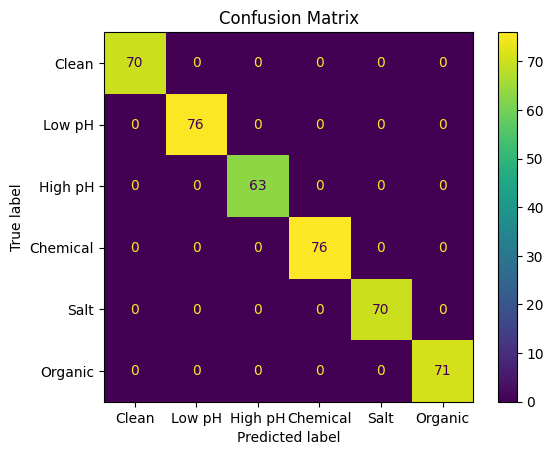

In [18]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title("Confusion Matrix")

g:\AIT\MLOps\ProjectAnalytics\mlops-analytics\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


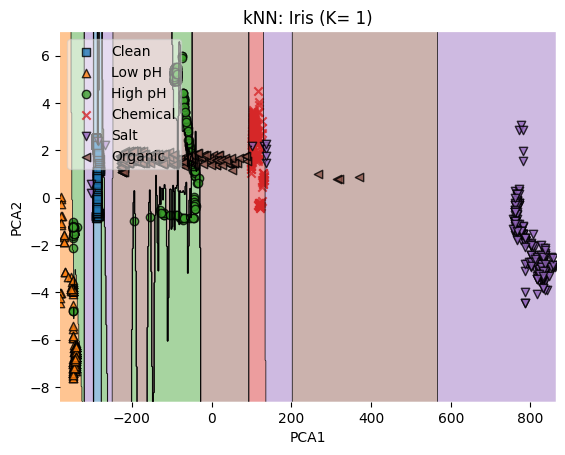

In [19]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt

# Convert y_train to NumPy array of integers
y_train_np = y_train.to_numpy().astype(np.int_)

# Plot decision regions
ax = plot_decision_regions(np.array(x_train), y_train_np, clf=model, legend=2)

# Add legend and labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc="upper left")

plt.title("kNN: Iris (K= {})".format(k))
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [20]:
input_raw = np.array([[0.1, 0.33, 0.34, 10000.25]])  # original 4 features
input_transformed = pca.transform(input_raw)      # reduce to 2D
prediction = model.predict(input_transformed)

print("Predicted class:", prediction[0])

Predicted class: 4


g:\AIT\MLOps\ProjectAnalytics\mlops-analytics\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [21]:
import joblib

joblib.dump(model, r'G:\AIT\MLOps\ProjectAnalytics\ml\model/raw_knn_pca_model.joblib')

['G:\\AIT\\MLOps\\ProjectAnalytics\\ml\\model/raw_knn_pca_model.joblib']